In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
# import data
file = "data/CPITimeSeries.csv"
df = pd.read_csv(file)

C:\Users\Miguel Galvão\AppData\Local\Temp\ipykernel_67964\1134312429.py:3: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [21]:
# drop unnecessary years
year_month = []
for i in range(40):
    for j in range(12):
        pr = f'19{50+i}M{j+1}'
        year_month.append(pr)

df.drop(year_month, axis=1, inplace=True)

# select country data
country = "Netherlands, The"

country_data = df[(df['Country Name'] == country) & (df['Indicator Code'] == 'PCPI_IX') & (df['Attribute'] == 'Value')]

# Extract CPI information
country_cpi_data = country_data.iloc[0, 5:-2].to_numpy(dtype=np.float64)
country_cpi_data = pd.Series(data=country_cpi_data, index=np.arange(len(country_cpi_data)), name="CPI TS")

print("Done")

Done


In [5]:
months = df.columns.to_list()


In [6]:
ticks = []
for i in range(0, len(year_month), 12):
    ticks.append(year_month[i])

Text(0.5, 0, 'Time (Months)')

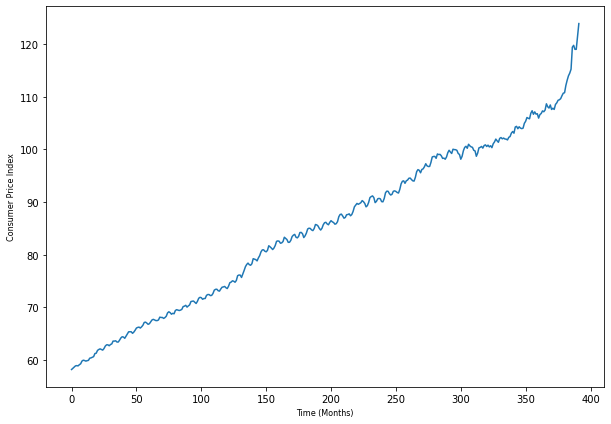

In [22]:
# plot time series
ax = country_cpi_data.plot(figsize=(10,7))
ax.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax.set_xlabel('Time (Months)',fontdict={'fontsize':8})

Text(0.5, 0, 'Time (Months)')

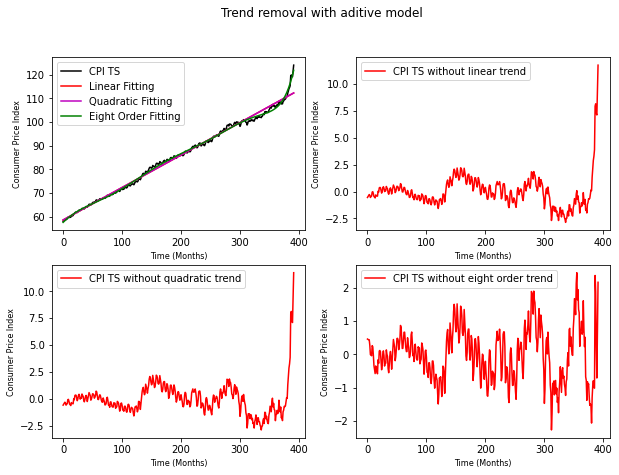

In [75]:
# Fit linear and quadratic trend estimation as additive model
#Linear trend estimation by fitting
months = np.arange(len(country_cpi_data))

coefs=np.polyfit(months,country_cpi_data.array,1)
linVals=np.polyval(coefs,months)
linTS=pd.Series(data=linVals,index=months,name="Linear Fitting")

#Quadratic trend estimation by fitting
coefs=np.polyfit(months,country_cpi_data.array,2)
quadVals=np.polyval(coefs,months)
quadTS=pd.Series(data=quadVals,index=months,name="Quadratic Fitting")

#8th order trend estimation by fitting
coefs=np.polyfit(months,country_cpi_data.array,8)
eightOrder=np.polyval(coefs,months)
eightOrderTs=pd.Series(data=eightOrder,index=months,name="Eight Order Fitting")

# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle('Trend removal with aditive model')

ax=country_cpi_data.plot(ax=ax1, legend=True,color='k', figsize=(10, 7))
linTS.plot(ax=ax1,legend=True,color='r')
quadTS.plot(ax=ax1,legend=True,color='m')
eightOrderTs.plot(ax=ax1,legend=True,color='g', figsize=(10, 7))
ax.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax.set_xlabel('Time (Months)',fontdict={'fontsize':8})

#Remove linear trend
shTsNoLinTrend=country_cpi_data-linTS
shTsNoLinTrend.name="CPI TS without linear trend"
shTsNoLinTrend.plot(ax=ax2, legend=True,color='r', figsize=(10, 7))
ax2.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax2.set_xlabel('Time (Months)',fontdict={'fontsize':8})


#Remove quadratic trend
noQuadTrend=country_cpi_data-quadTS
noQuadTrend.name="CPI TS without quadratic trend"
noQuadTrend.plot(ax=ax3, legend=True,color='r', figsize=(10, 7))
ax3.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax3.set_xlabel('Time (Months)',fontdict={'fontsize':8})


#Remove 8th order trend
noEightTrend=country_cpi_data-eightOrderTs
noEightTrend.name="CPI TS without eight order trend"
noEightTrend.plot(ax=ax4, legend=True,color='r', figsize=(10, 7))
ax4.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax4.set_xlabel('Time (Months)',fontdict={'fontsize':8})

Text(0.5, 0, 'Time (Months)')

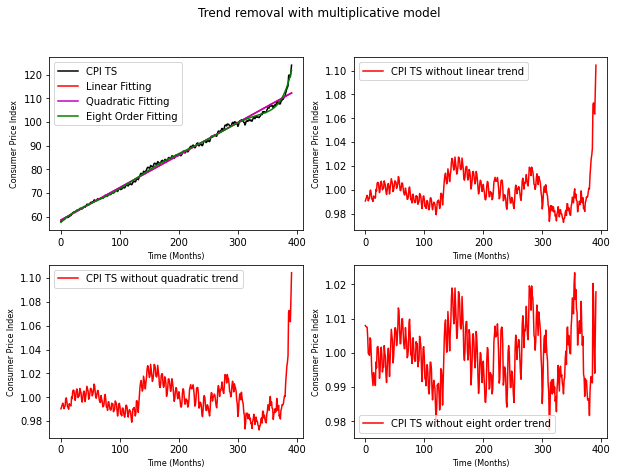

In [77]:
# Fit linear and quadratic trend estimation as multiplicative model
#Linear trend estimation by fitting

# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle('Trend removal with multiplicative model')

ax=country_cpi_data.plot(ax=ax1, legend=True,color='k', figsize=(10, 7))
linTS.plot(ax=ax1,legend=True,color='r')
quadTS.plot(ax=ax1,legend=True,color='m')
eightOrderTs.plot(ax=ax1,legend=True,color='g', figsize=(10, 7))
ax.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax.set_xlabel('Time (Months)',fontdict={'fontsize':8})

#Remove linear trend
shTsNoLinTrend=country_cpi_data/linTS
shTsNoLinTrend.name="CPI TS without linear trend"
shTsNoLinTrend.plot(ax=ax2, legend=True,color='r', figsize=(10, 7))
ax2.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax2.set_xlabel('Time (Months)',fontdict={'fontsize':8})


#Remove quadratic trend
noQuadTrend=country_cpi_data/quadTS
noQuadTrend.name="CPI TS without quadratic trend"
noQuadTrend.plot(ax=ax3, legend=True,color='r', figsize=(10, 7))
ax3.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax3.set_xlabel('Time (Months)',fontdict={'fontsize':8})


#Remove 8th order trend
noEightTrend=country_cpi_data/eightOrderTs
noEightTrend.name="CPI TS without eight order trend"
noEightTrend.plot(ax=ax4, legend=True,color='r', figsize=(10, 7))
ax4.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax4.set_xlabel('Time (Months)',fontdict={'fontsize':8})

In [31]:
#Train=0.7 Test=0.3
train_ds_pct = 0.7
country_cpi_data

train_ds_len = int(len(country_cpi_data) * train_ds_pct)
test_ds_len = len(country_cpi_data) - train_ds_len
print("train: " + str(train_ds_len))
print("test: " + str(test_ds_len))

train_ds = country_cpi_data[:train_ds_len]
test_ds = country_cpi_data[-train_ds_len:]

train: 274
test: 118
